In [2]:
import requests
import pandas as pd
import io

def fetch_small_data_from_github(fname):
    url = f"https://raw.githubusercontent.com/acd-engine/jupyterbook/master/data/analysis/{fname}"
    response = requests.get(url)
    rawdata = response.content.decode('utf-8')
    return pd.read_csv(io.StringIO(rawdata))

df_detailled = fetch_small_data_from_github('DAAO_AustLit_exactmatches_detailed.csv')

# Clean textual sections
df_detailled['AgentText_Bio'] = df_detailled['AgentText'].apply(lambda x: x\
                                                .split('×Bio changes summary\nClose')[-1]\
                                                .split('Most Referenced Works')[0]\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip() if "×Bio" in x else '')

df_detailled['AgentText_Notes'] = df_detailled['AgentText'].apply(lambda x: x.split('Notes')[-1]\
                                            .split('Last amended')[0]\
                                            .split('Awards for Works')[0]\
                                            .replace('\n', ' ')\
                                            .replace('\t', ' ')\
                                            .replace("\'", "")\
                                            .replace("  ", " ")\
                                            .strip() if "Notes" in x else '')

df_detailled['AgentText_Awards'] = df_detailled['AgentText'].apply(lambda x: x.split('Awards for Works')[-1]\
                                            .split('VIEW ALL AWARDS')[0]\
                                            .replace('\n', ' ')\
                                            .replace('\t', ' ')\
                                            .replace("\'", "")\
                                            .replace("  ", " ")\
                                            .strip() if "Awards for Works" in x else '')

df_detailled['agentWorksBy'] = df_detailled['agentWorksBy'].apply(lambda x: x\
                                                .replace('\nWorks ByPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

df_detailled['agentWorksAbout'] = df_detailled['agentWorksAbout'].apply(lambda x: x\
                                                .replace('\nWorks AboutPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

df_detailled['agentWorksWorks'] = df_detailled['agentWorksWorks'].apply(lambda x: x\
                                                .replace('\nWorks About Their WorksPreview all','')\
                                                .replace('\n', ' ')\
                                                .replace('\t', ' ')\
                                                .replace("\'", "")\
                                                .replace("  ", " ")\
                                                .strip())

In [3]:
import numpy as np
df_detailled['agentWorksBy_count'] = np.where(df_detailled.agentWorksBy == "", False, True)
df_detailled['agentWorksAbout_count'] = np.where(df_detailled.agentWorksAbout == "", False, True)
df_detailled['agentWorksWorks_count'] = np.where(df_detailled.agentWorksWorks == "", False, True)
df_detailled['AgentText_Awards_count'] = np.where(df_detailled.AgentText_Awards == "", False, True)

# Top 5 by word count
df_detailled["AgentText_word_count"] = df_detailled["AgentText"].apply(lambda x: len(x.split()))
df_detailled["agentWorksBy_word_count"] = df_detailled["agentWorksBy"].apply(lambda x: len(x.split()))
df_detailled["agentWorksAbout_word_count"] = df_detailled["agentWorksAbout"].apply(lambda x: len(x.split()))
df_detailled["agentWorksWorks_word_count"] = df_detailled["agentWorksWorks"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Bio_word_count"] = df_detailled["AgentText_Bio"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Notes_word_count"] = df_detailled["AgentText_Notes"].apply(lambda x: len(x.split()))
df_detailled["AgentText_Awards_word_count"] = df_detailled["AgentText_Awards"].apply(lambda x: len(x.split()))
df_detailled["total_word_count"] = df_detailled["AgentText_word_count"] + df_detailled["agentWorksBy_word_count"] + df_detailled["agentWorksAbout_word_count"] + df_detailled["agentWorksWorks_word_count"] + df_detailled["AgentText_Bio_word_count"] + df_detailled["AgentText_Notes_word_count"] + df_detailled["AgentText_Awards_word_count"]
df_detailled

display(df_detailled[["FullName","AgentText_word_count"]].sort_values("AgentText_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksBy_word_count"]].sort_values("agentWorksBy_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksAbout_word_count"]].sort_values("agentWorksAbout_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksWorks_word_count"]].sort_values("agentWorksWorks_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Bio_word_count"]].sort_values("AgentText_Bio_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Notes_word_count"]].sort_values("AgentText_Notes_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Awards_word_count"]].sort_values("AgentText_Awards_word_count", ascending=False).head(5))
display(df_detailled[["FullName","total_word_count"]].sort_values("total_word_count", ascending=False).head(5))

,FullName,AgentText_word_count
115,Dusan Marek,1597
125,Archie Moore,1311
65,Fiona Foley,1024
95,Deborah Kelly,961
174,Christian Thompson,957


,FullName,agentWorksBy_word_count
176,Richard Kelly Tipping,10325
10,Bronwyn Bancroft,3943
115,Dusan Marek,3757
8,John Armstrong,3147
76,Barbara Hanrahan,2666


,FullName,agentWorksAbout_word_count
129,Albert Namatjira,4589
76,Barbara Hanrahan,4558
135,Sidney Nolan,4522
67,Donald Friend,2445
141,Margaret Olley,2092


,FullName,agentWorksWorks_word_count
76,Barbara Hanrahan,9071
10,Bronwyn Bancroft,4286
188,Cathy Wilcox,3597
176,Richard Kelly Tipping,2490
67,Donald Friend,1840


,FullName,AgentText_Bio_word_count
115,Dusan Marek,1194
125,Archie Moore,893
174,Christian Thompson,486
76,Barbara Hanrahan,440
135,Sidney Nolan,393


,FullName,AgentText_Notes_word_count
2,Thelma Afford,259
157,Robert Rooney,199
176,Richard Kelly Tipping,112
65,Fiona Foley,92
109,Keith Looby,57


,FullName,AgentText_Awards_word_count
95,Deborah Kelly,471
126,Margaret Morgan,418
1,Ian Abdulla,351
10,Bronwyn Bancroft,305
188,Cathy Wilcox,281


,FullName,total_word_count
76,Barbara Hanrahan,17588
176,Richard Kelly Tipping,15148
10,Bronwyn Bancroft,10211
135,Sidney Nolan,8565
67,Donald Friend,7246


In [4]:
df_detailled["AgentText_unique_word_count"] = df_detailled["AgentText"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksBy_unique_word_count"] = df_detailled["agentWorksBy"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksAbout_unique_word_count"] = df_detailled["agentWorksAbout"].apply(lambda x: len(set(x.split())))
df_detailled["agentWorksWorks_unique_word_count"] = df_detailled["agentWorksWorks"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Bio_unique_word_count"] = df_detailled["AgentText_Bio"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Notes_unique_word_count"] = df_detailled["AgentText_Notes"].apply(lambda x: len(set(x.split())))
df_detailled["AgentText_Awards_unique_word_count"] = df_detailled["AgentText_Awards"].apply(lambda x: len(set(x.split())))
df_detailled["total_unique_word_count"] = df_detailled["AgentText_unique_word_count"] + df_detailled["agentWorksBy_unique_word_count"] + df_detailled["agentWorksAbout_unique_word_count"] + df_detailled["agentWorksWorks_unique_word_count"] + df_detailled["AgentText_Bio_unique_word_count"] + df_detailled["AgentText_Notes_unique_word_count"] + df_detailled["AgentText_Awards_unique_word_count"]

display(df_detailled[["FullName","AgentText_unique_word_count"]].sort_values("AgentText_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksBy_unique_word_count"]].sort_values("agentWorksBy_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksAbout_unique_word_count"]].sort_values("agentWorksAbout_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","agentWorksWorks_unique_word_count"]].sort_values("agentWorksWorks_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Bio_unique_word_count"]].sort_values("AgentText_Bio_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Notes_unique_word_count"]].sort_values("AgentText_Notes_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","AgentText_Awards_unique_word_count"]].sort_values("AgentText_Awards_unique_word_count", ascending=False).head(5))
display(df_detailled[["FullName","total_unique_word_count"]].sort_values("total_unique_word_count", ascending=False).head(5))

,FullName,AgentText_unique_word_count
115,Dusan Marek,847
125,Archie Moore,730
65,Fiona Foley,595
174,Christian Thompson,567
95,Deborah Kelly,564


,FullName,agentWorksBy_unique_word_count
176,Richard Kelly Tipping,2442
8,John Armstrong,1396
10,Bronwyn Bancroft,1349
115,Dusan Marek,1237
76,Barbara Hanrahan,864


,FullName,agentWorksAbout_unique_word_count
135,Sidney Nolan,1775
129,Albert Namatjira,1744
76,Barbara Hanrahan,1541
67,Donald Friend,1025
141,Margaret Olley,852


,FullName,agentWorksWorks_unique_word_count
76,Barbara Hanrahan,1899
10,Bronwyn Bancroft,936
126,Margaret Morgan,728
176,Richard Kelly Tipping,687
188,Cathy Wilcox,584


,FullName,AgentText_Bio_unique_word_count
115,Dusan Marek,606
125,Archie Moore,484
174,Christian Thompson,291
76,Barbara Hanrahan,253
135,Sidney Nolan,245


,FullName,AgentText_Notes_unique_word_count
157,Robert Rooney,148
2,Thelma Afford,144
176,Richard Kelly Tipping,90
65,Fiona Foley,76
109,Keith Looby,42


,FullName,AgentText_Awards_unique_word_count
95,Deborah Kelly,277
126,Margaret Morgan,243
188,Cathy Wilcox,187
70,George Gittoes,186
1,Ian Abdulla,154


,FullName,total_unique_word_count
76,Barbara Hanrahan,5063
176,Richard Kelly Tipping,4409
135,Sidney Nolan,3462
10,Bronwyn Bancroft,3324
67,Donald Friend,3170


In [ ]:
# -------------- To run this chunk, you will need --------------------------
# acde_person.csv
# you can download from this public link - https://drive.google.com/file/d/1Vy-HiUHZuy8C247_m2flWYtfUpnkIgRf/view?usp=drive_link

acde_people = pd.read_csv("data/acde_person.csv")
daao_people = acde_people[acde_people["data_source"].str.contains("DAAO")]
austlit_daao500 = daao_people[daao_people.display_name.str.replace('"','').isin(df_detailled.FullName)]

/var/folders/x1/q8_jsr_d6p56j8mp81gq4zxr0000gp/T/ipykernel_98531/2752394424.py:1: DtypeWarning: Columns (4,5,9,11,12,14,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  acde_people = pd.read_csv("data/acde_person.csv")


In [6]:
import json
import ast

# identify artists with related people
frame_related_people = austlit_daao500[austlit_daao500.related_people.notnull()]
austlit_daao_links = frame_related_people[frame_related_people.related_people != 0]["display_name"].tolist()

frame_related_people["ori_dbid"] = frame_related_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])

# for each KMN-DAAO match, fetch related people data
related_records = pd.DataFrame()
for daao_link in austlit_daao_links:
    this_artist = frame_related_people[frame_related_people["display_name"] == daao_link].iloc[0]
    data = pd.DataFrame(json.loads(str(this_artist["related_people"])))
    data["Artist"] = this_artist["display_name"]
    data["oid"] = this_artist["ori_dbid"]
    related_records = pd.concat([related_records, data])

# add predicate column
predicate = []
related_person_oid = []
for _,row in related_records.iterrows():
    if row["subject"]["label"] == row["Artist"].replace('"', ''):
        predicate.append(row.get("predicate", {}).get("term", "associate of"))
        related_person_oid.append(row["object"].get("ori_dbid", {}).get("$oid", np.nan))
    else:
        predicate.append(row.get("predicate", {}).get("reverse_term", "associate of"))
        related_person_oid.append(row["subject"].get("ori_dbid", {}).get("$oid", np.nan))

related_records["predicate"] = predicate
related_records["related_person_oid"] = related_person_oid
related_records = related_records[["Artist","oid","related_person_oid","predicate"]].drop_duplicates()

/var/folders/x1/q8_jsr_d6p56j8mp81gq4zxr0000gp/T/ipykernel_98531/1165877516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_related_people["ori_dbid"] = frame_related_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])


In [7]:
related_links = related_records["related_person_oid"].tolist()
daao_people["oid"] = daao_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])

# for each KMN-DAAO match, fetch related people data
related_records2 = pd.DataFrame()
for daao_link2 in related_links:
    this_artist = daao_people[daao_people["oid"] == daao_link2].iloc[0]
    data = pd.DataFrame(json.loads(str(this_artist["related_people"])))
    data["Related_Artist"] = this_artist["display_name"]
    data["related_person_oid"] = this_artist["oid"]
    related_records2 = pd.concat([related_records2, data])

/var/folders/x1/q8_jsr_d6p56j8mp81gq4zxr0000gp/T/ipykernel_98531/2790395884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daao_people["oid"] = daao_people["ori_dbid"].apply(lambda x: ast.literal_eval(x)["$oid"])


In [ ]:
# !pip install networkx

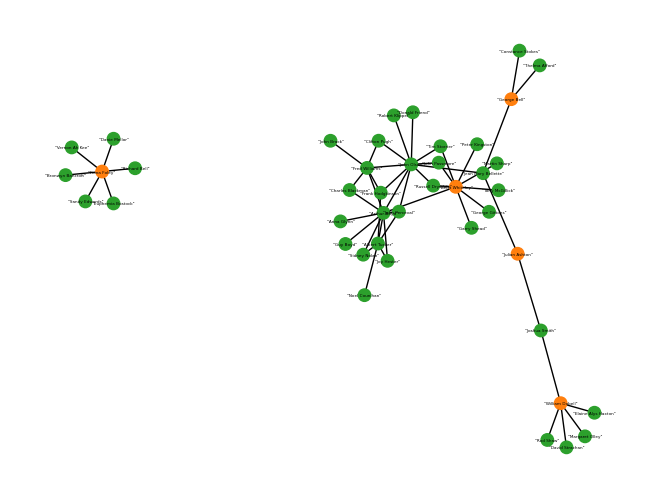

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(9).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('austlit-relatedpeople-intersect-network-influence100.svg', format='svg')

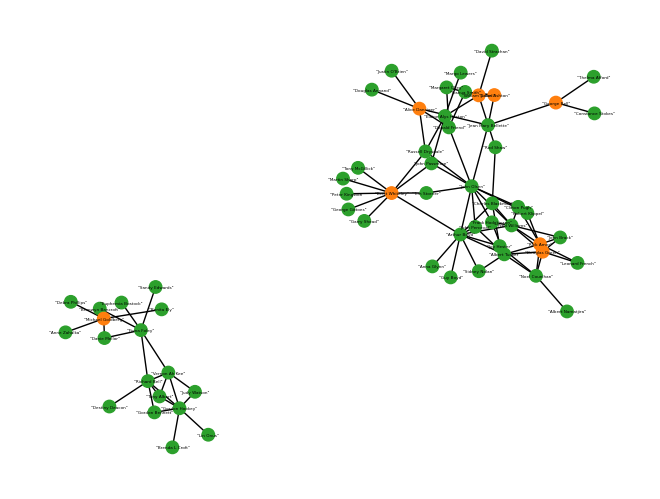

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(20).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('austlit-relatedpeople-intersect-network-influence70.svg', format='svg')

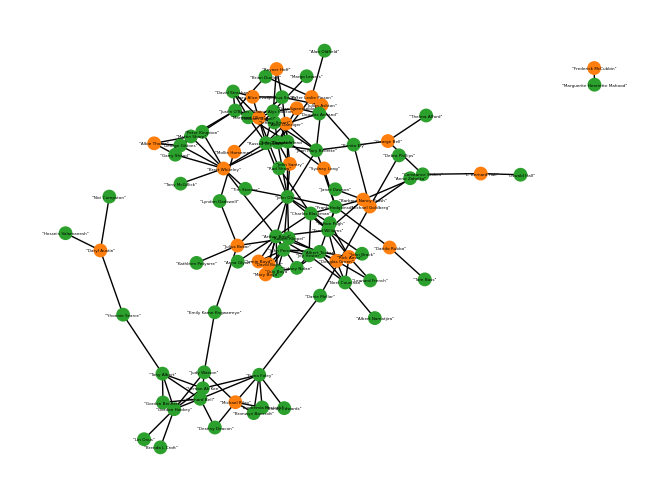

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import json
import pandas as pd

# create a network graph of frame_records_withname where there are two types of nodes: Artist and display_name
# and the edges are the relationships between them which is the predicate column
%matplotlib inline

related_records["influential"] = np.where(related_records["related_person_oid"].isin(related_records2.related_person_oid.value_counts().head(48).index.values), True, False)
related_records_influential = pd.merge(related_records[related_records["influential"]], related_records2[["Related_Artist","related_person_oid"]], on="related_person_oid", how="left")
# related_records.influential.value_counts()

G = nx.from_pandas_edgelist(related_records_influential, source='Artist', target='Related_Artist', edge_attr='predicate')

# show edges
edge_labels = nx.get_edge_attributes(G, 'predicate')
pos = nx.spring_layout(G, seed=42, k=0.15)

# make colour dependent on gender
colors = []
for node in G.nodes():
    node_artist_frame = related_records_influential[related_records_influential.Artist == node]
    node_related_frame = related_records_influential[related_records_influential.Related_Artist == node]

    if node_artist_frame.shape[0] > 0:
        colors.append('tab:green')
    else:
        colors.append('tab:orange')

nx.draw(G, pos, with_labels=True, node_size=80, font_size=3, node_color=colors)
plt.savefig('austlit-relatedpeople-intersect-network-influence50.svg', format='svg')